In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\All.csv')


In [12]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Drop the target column ('URL_Type_obf_Type') to avoid using it in clustering
X = df_cleaned.drop(columns=['URL_Type_obf_Type'])

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA for dimensionality reduction (optional but helps with visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)  # Use the scaled features for clustering

# Assign the cluster labels to the df_cleaned DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Step 4: Ensure you exclude non-numeric columns when grouping by 'Cluster'
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

# Now calculate the mean only for numeric columns
cluster_analysis = df_cleaned.groupby('Cluster')[numeric_columns].mean()

# Print the cluster analysis results
print(cluster_analysis)

# Optional: Save the clustered dataset for further analysis
df_cleaned.to_csv(r'C:\Users\arell\Documents\1_ALF\data/clustered_urls.csv', index=False)


C:\Users\arell\AppData\Local\Temp\ipykernel_3748\1426983049.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.labels_


         Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
Cluster                                                                         
0           0.543457            3.465534          6.852348           5.699613   
1           0.762871            2.304125          8.533663           5.053974   
2          34.720207            3.052478         11.579381           4.819953   
3         876.323077            3.000000          6.000000           4.333334   

         longdomaintokenlen  avgpathtokenlen       tld  charcompvowels  \
Cluster                                                                  
0                 11.092907         4.466156  3.465534        8.766234   
1                  7.722442         4.907415  2.304125       10.733993   
2                  9.003587         4.603256  3.052478       19.233426   
3                  9.000000         2.500000  3.000000      107.302564   

         charcompace     ldl_url  ...  SymbolCount_FileName  \
Clust

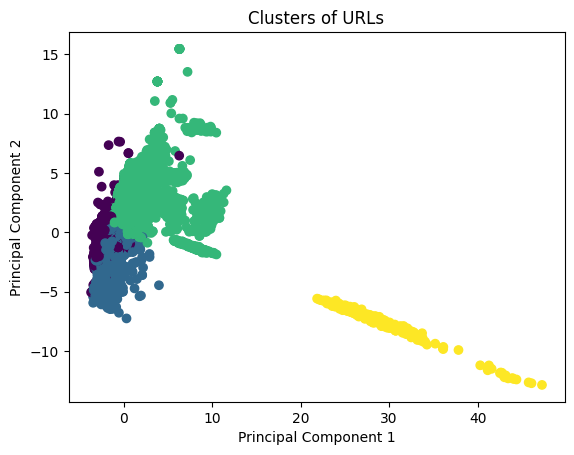

In [13]:
import matplotlib.pyplot as plt

# Visualize the 2D PCA projection of the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cleaned['Cluster'], cmap='viridis')
plt.title('Clusters of URLs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [14]:
# Get the mean values of each feature for each cluster
cluster_analysis = df_cleaned.groupby('Cluster').mean()

# Print or save this to analyze which features differentiate clusters
print(cluster_analysis)

TypeError: agg function failed [how->mean,dtype->object]